In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("sneaker_sales\Jordan 1 Retro Royal (2017).csv")
df.head()

,Unnamed: 0,createdAt,amount,shoeSize
0,0,2018-02-19 15:09:57,290,9.0
1,1,2018-02-19 15:00:19,283,9.5
2,2,2018-02-19 14:43:59,270,10.5
3,3,2018-02-19 14:16:17,252,10.5
4,4,2018-02-19 14:05:10,240,13.0


In [4]:
df['createdAt'] = df['createdAt'].astype('datetime64[ns]')
df.head()

,Unnamed: 0,createdAt,amount,shoeSize
0,0,2018-02-19 15:09:57,290,9.0
1,1,2018-02-19 15:00:19,283,9.5
2,2,2018-02-19 14:43:59,270,10.5
3,3,2018-02-19 14:16:17,252,10.5
4,4,2018-02-19 14:05:10,240,13.0


In [5]:
# df.sort_values(by='Unnamed: 0', ascending=True)
df.sort_values(by='createdAt', ascending=False)
df['obs'] = [x for x in range(len(df), 0,-1)]
df.sort_values(by='obs', ascending=True, inplace=True)
df.head()

,Unnamed: 0,createdAt,amount,shoeSize,obs
32149,32149,2017-03-05 01:03:49,600,10.0,1
32148,32148,2017-03-06 15:24:50,600,10.0,2
32147,32147,2017-03-16 22:07:27,381,10.5,3
32146,32146,2017-03-16 22:07:33,360,10.5,4
32145,32145,2017-03-16 22:07:59,386,8.0,5


(0, 620)

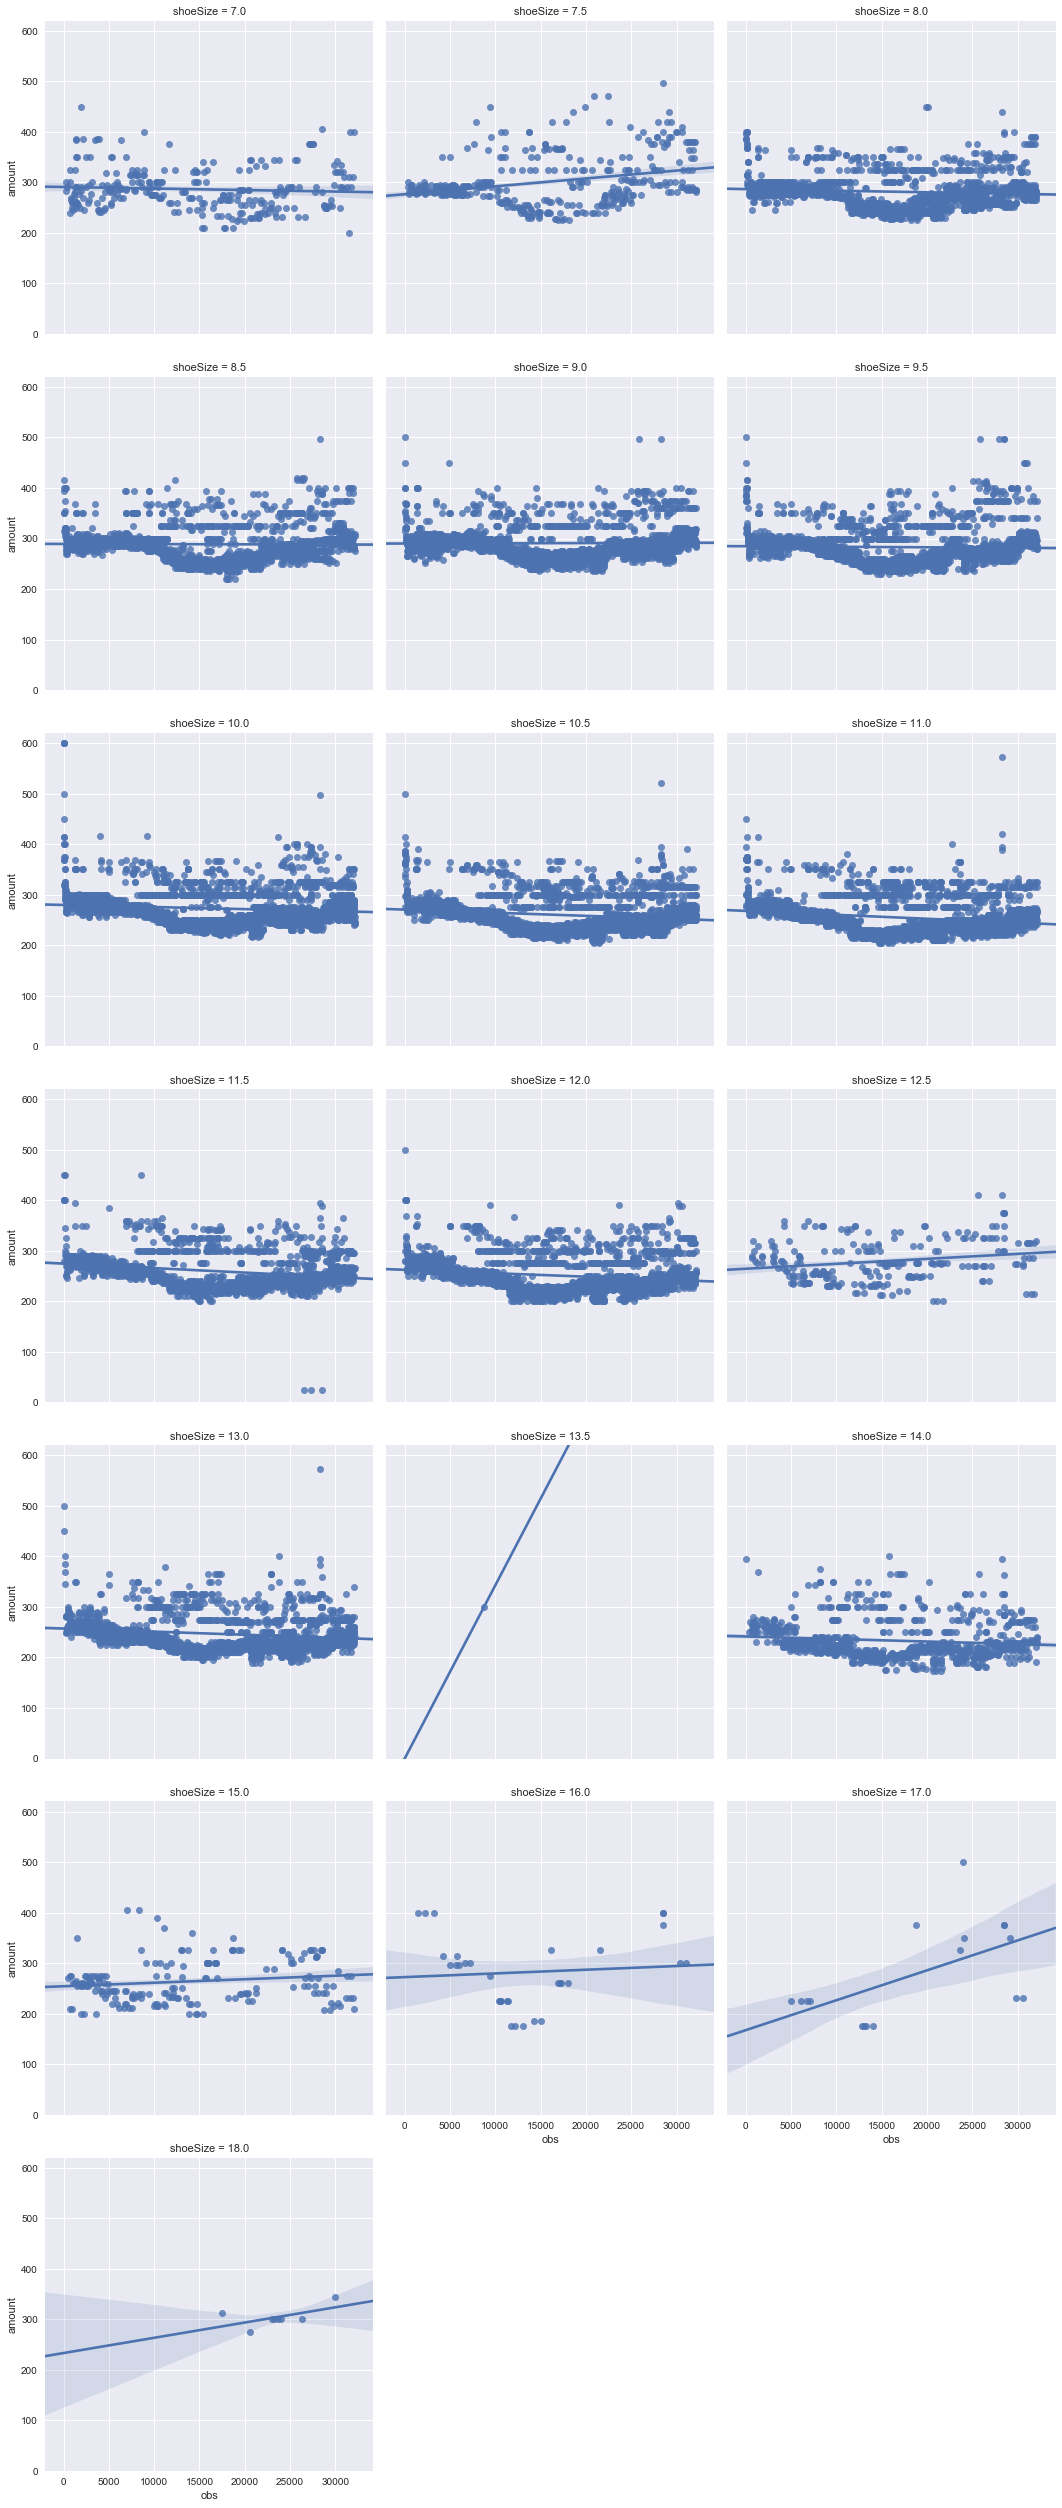

In [17]:
df2 = df[['createdAt', 'amount']]
# plt.rcParams['figure.figsize']=(20,10)
lm = sns.lmplot(data=df, x='obs', y='amount', col='shoeSize', col_wrap=3)
axes = lm.axes
axes[0,].set_ylim(0,620)

# plt.plot(df['createdAt'], df['amount'])
# plt.figure(figsize=(5,9), dpi=100)
# plt.show()

TypeError: slice indices must be integers or None or have an __index__ method

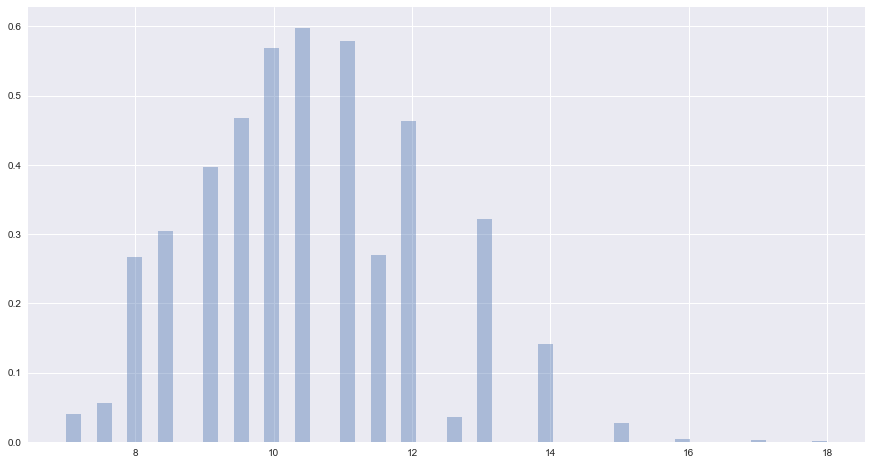

In [7]:
sns.set_context(context='notebook', rc={'figure.figsize':(15,8)})
sns.distplot(df['shoeSize'])

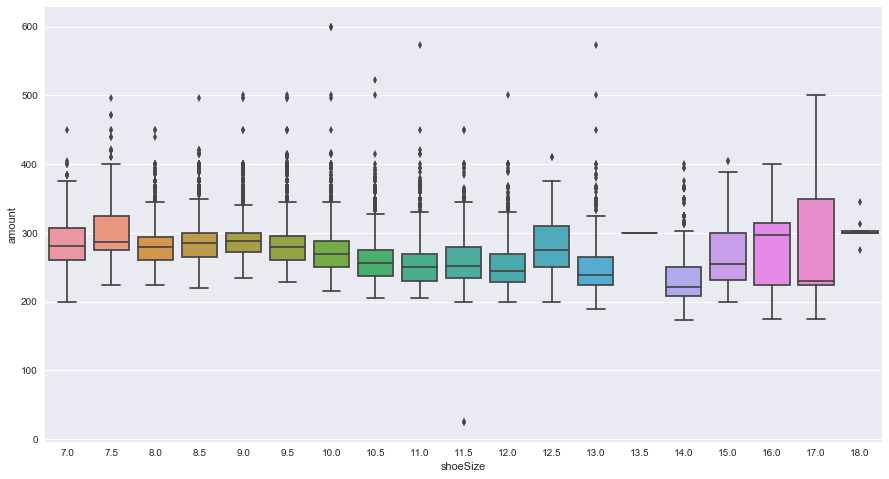

In [8]:
sns.boxplot(data=df, x='shoeSize', y='amount')

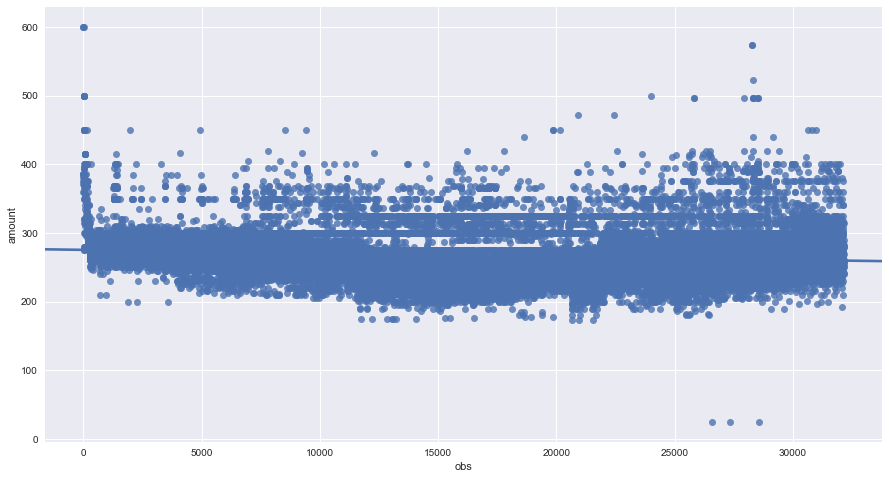

In [9]:
g = sns.regplot(x="obs", y="amount", data = df)



In [10]:
df[["amount"]].describe()

,amount
count,32150.000000
mean,267.582333
std,36.184261
min,25.000000
25%,241.000000
50%,265.000000
75%,289.000000
max,600.000000


In [11]:
import time
def dformat(createdat):
    return createdat.strftime('%m/%d/%Y')
df['Date'] = df.apply(lambda row: dformat(row['createdAt']), axis=1)
df['Date'].head()

32149    03/05/2017
32148    03/06/2017
32147    03/16/2017
32146    03/16/2017
32145    03/16/2017
Name: Date, dtype: object

In [13]:
len(df['Date'].unique())

345

In [18]:
# datedf = df.groupby('Date').obs.nunique()
# datedf = df['Date'].unique
# datedf = pd.DataFrame
dates = df['Date'].unique()
obs = list(df.groupby('Date').obs.nunique().values)
# newdict = dict(zip(dates,obs))
newdict = {}
newdict['Dates'] = dates
newdict['obs'] = obs
datedf = pd.DataFrame(newdict)

# datedf.head(30)
datedf['obs'].mean()

# l = df['Date'].unique()
# l
# datedf['Date'] = l

93.18840579710145

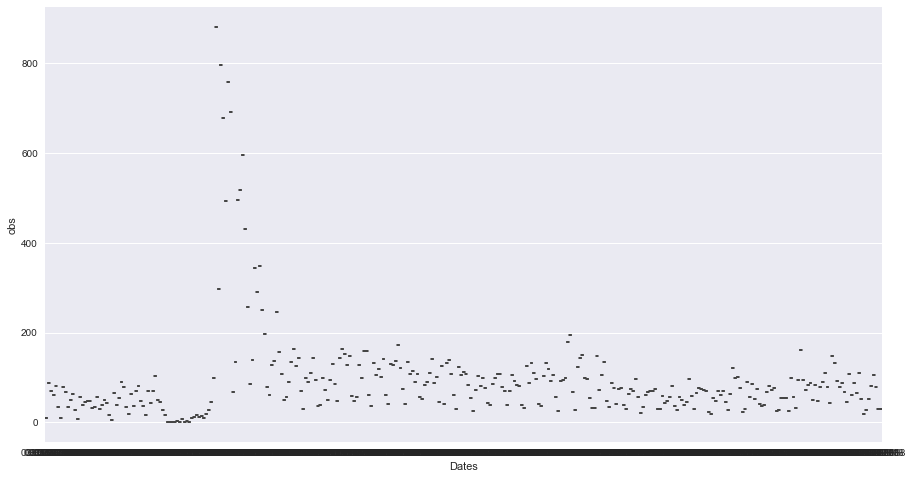

In [15]:
sns.boxplot(data=datedf, x="Dates", y="obs")

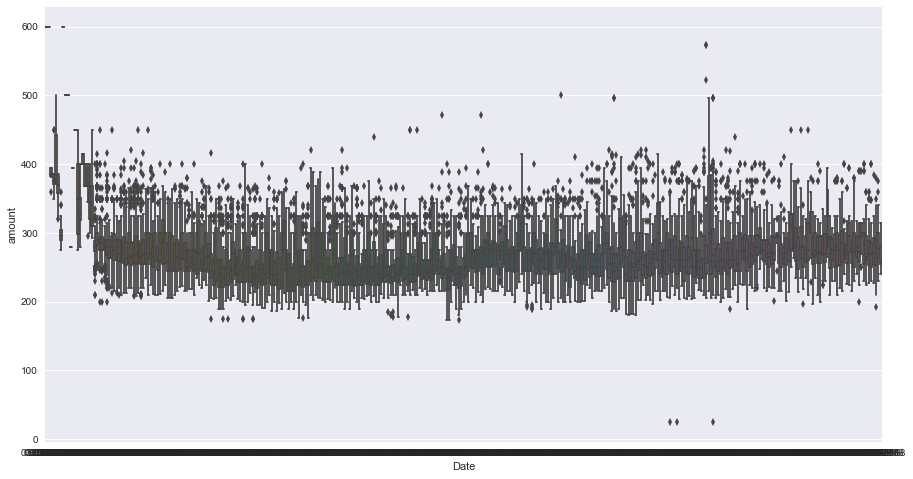

In [16]:
sns.boxplot(data=df, x="Date", y="amount")